In [1]:
import numpy as np
import h5py
import os
import argparse
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.stats import skew, kurtosis

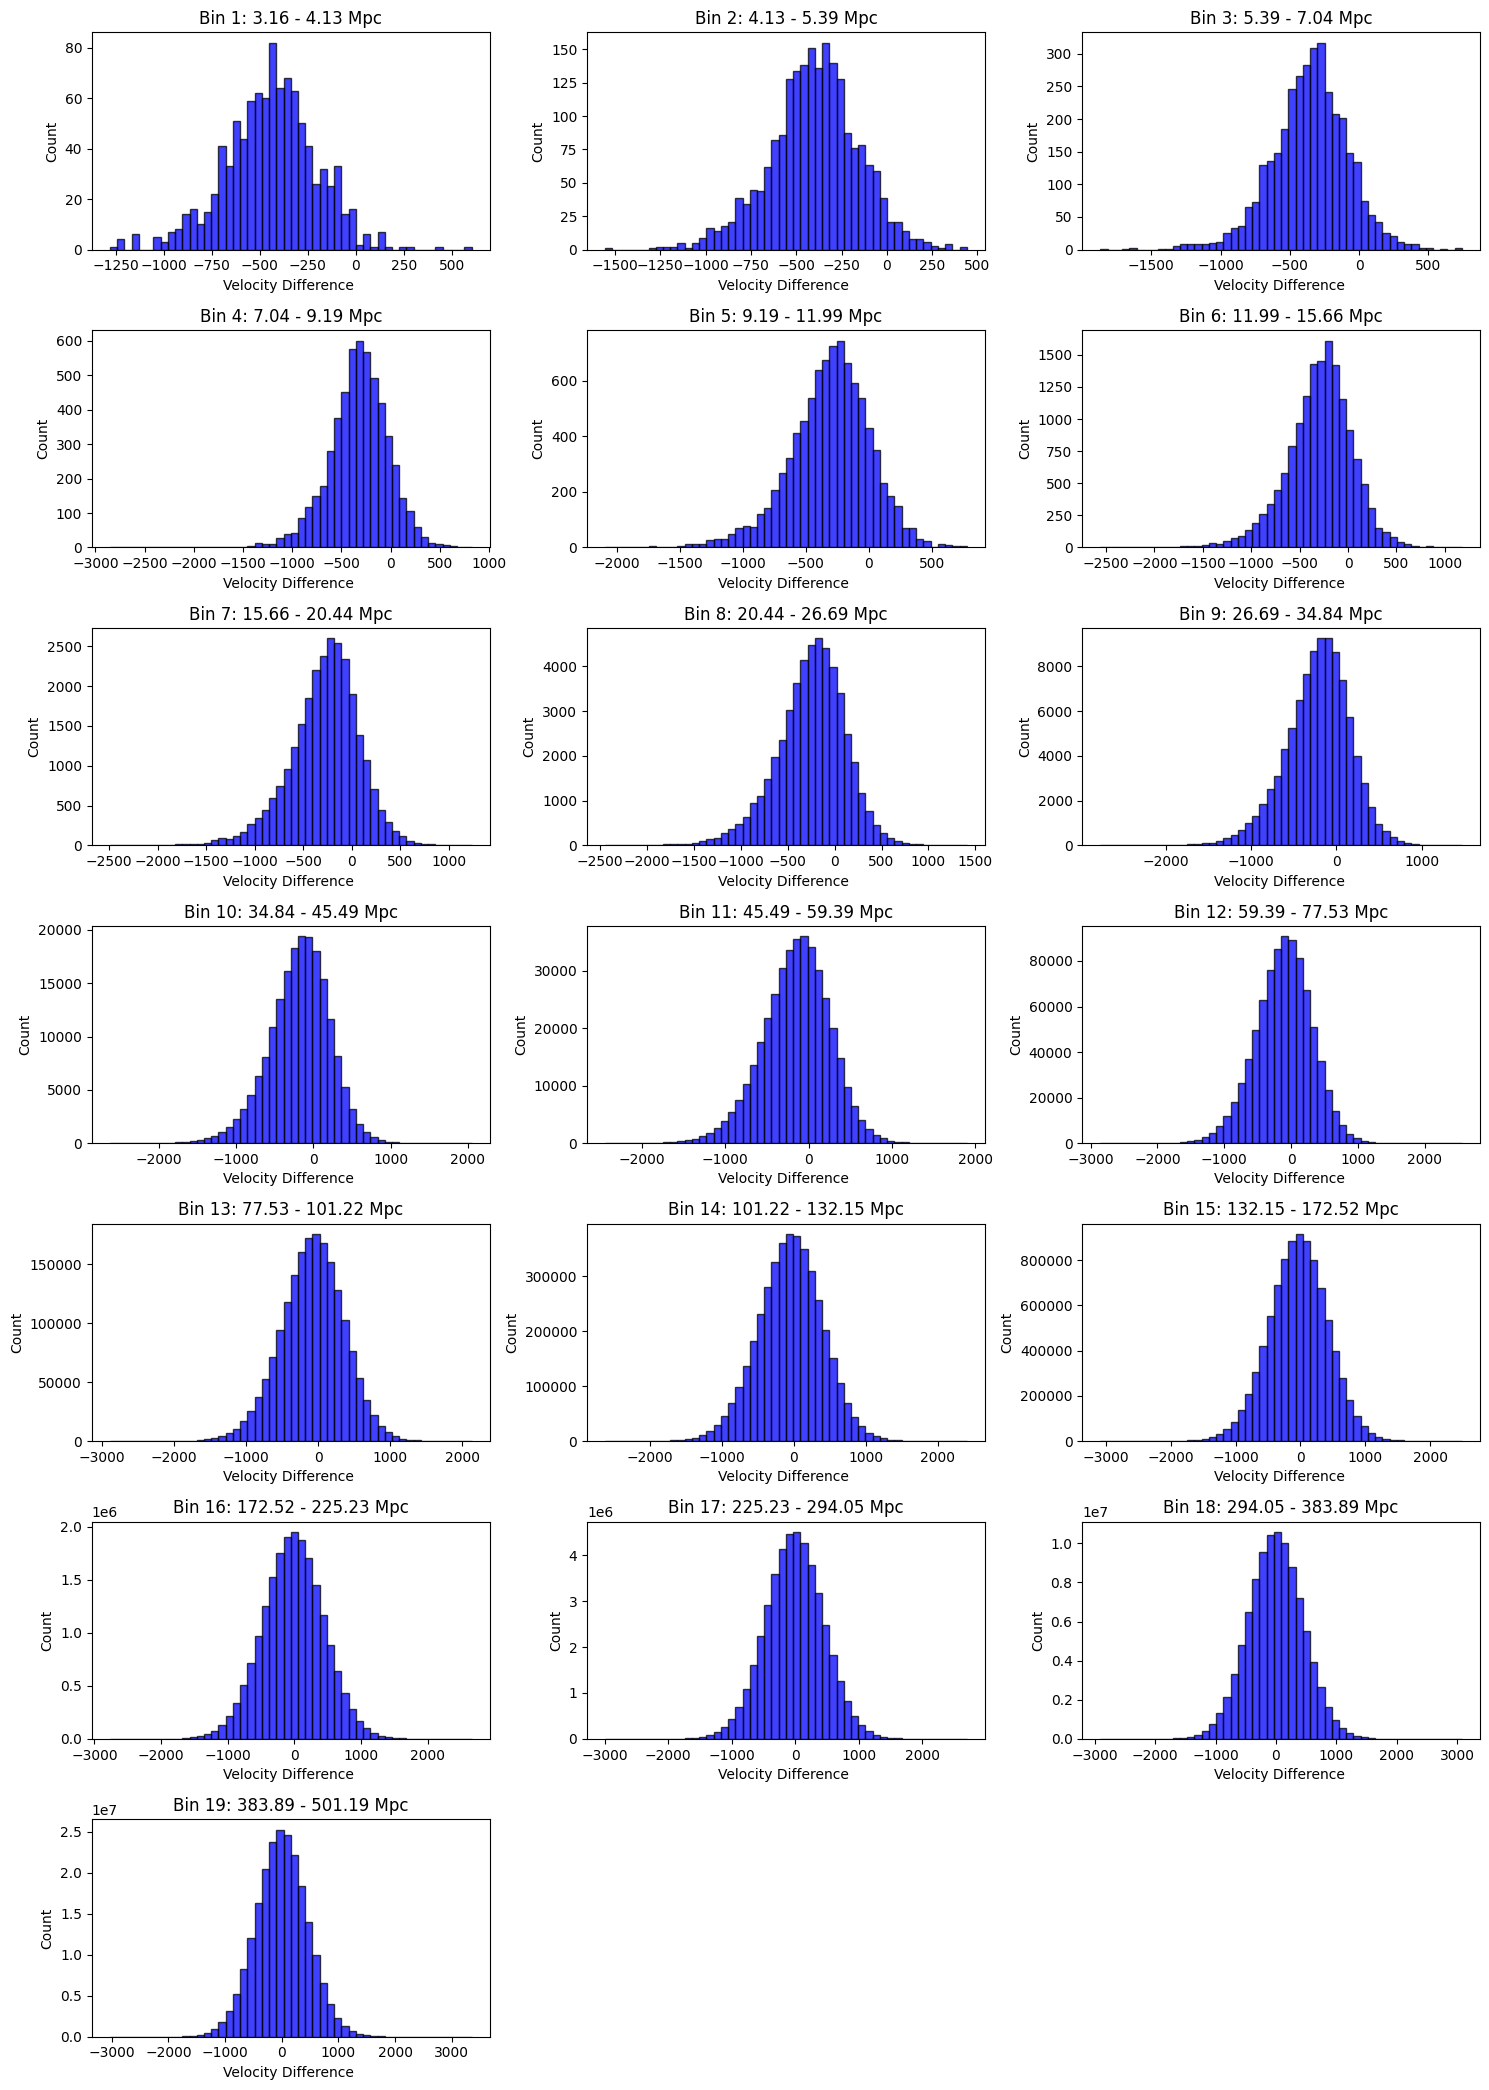

In [2]:
# Define radial bins
radial_bins = np.logspace(0.5, 2.7, 20).astype(np.float32)

with h5py.File("/disks/cosmodm/vdvuurst/data/velocity_data_M4_4_5.hdf5", "r") as f:
# with h5py.File("velocity_data_M14_14_5_trial_NORMAL_SIGMA_largersecondary_newquantity_lowsigma8.h5", "r") as f:
    radial_distances = f["radial_distances"][:]
    velocities = f["velocity_differences"][:]
    
# np.max(radial_distances)
bin_indices = np.digitize(radial_distances, bins=radial_bins) - 1
num_bins = len(radial_bins) - 1  


num_cols = 3
num_rows = int(np.ceil(num_bins / num_cols))  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()  

mean, dispersion, skews, kurt = [], [], [], []

for bin_idx in range(num_bins):
    bin_mask = bin_indices == bin_idx
    bin_velocities = velocities[bin_mask]
    
    if len(bin_velocities) == 0:
        continue

    mean.append(np.mean(bin_velocities))
    dispersion.append(np.std(bin_velocities))
    skews.append(skew(bin_velocities))
    kurt.append(kurtosis(bin_velocities))
    
    ax = axes[bin_idx]
    ax.hist(bin_velocities, bins=50, alpha=0.75, color='b', edgecolor='black')
    ax.set_xlabel("Velocity Difference ")
    ax.set_ylabel("Count")
    ax.set_title(f"Bin {bin_idx + 1}: {radial_bins[bin_idx]:.2f} - {radial_bins[bin_idx + 1]:.2f} Mpc")


for i in range(num_bins, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
# plt.savefig("velocity_histograms_new2halo.png", dpi=700)
plt.show()


In [3]:
radial_distances.shape[0]

767657375

## Plot of the moments of the distributions

In [15]:
# radial_bins = np.logspace(0.5, 2.7, 20).astype(np.float32)
radial_bins = np.linspace(np.min(radial_distances),np.max(radial_distances),30).astype(np.float32)
# np.max(radial_distances)
bin_indices = np.digitize(radial_distances, bins=radial_bins) - 1
num_bins = len(radial_bins) - 1  

mean, dispersion, skews, kurt = [], [], [], []

for bin_idx in range(num_bins):
    bin_mask = bin_indices == bin_idx
    bin_velocities = velocities[bin_mask]
    
    if len(bin_velocities) == 0:
        continue

    mean.append(np.mean(bin_velocities))
    dispersion.append(np.std(bin_velocities))
    skews.append(skew(bin_velocities))
    kurt.append(kurtosis(bin_velocities,fisher = False))


In [5]:
# We define some properties for the figures
SMALL_SIZE = 10 * 2 
MEDIUM_SIZE = 12 * 2
BIGGER_SIZE = 14 * 2

plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title\n",
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels\n",
plt.rc('xtick', labelsize=SMALL_SIZE, direction='out')   # fontsize of the tick labels\n",
plt.rc('ytick', labelsize=SMALL_SIZE, direction='out')   # fontsize of the tick labels\n",
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize\n",
mpl.rcParams['axes.titlesize'] = BIGGER_SIZE
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'STIXgeneral'

mpl.rcParams['figure.dpi'] = 100

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['ytick.minor.size'] = 4

mpl.rcParams['xtick.major.width'] = 1.25
mpl.rcParams['ytick.major.width'] = 1.25
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1

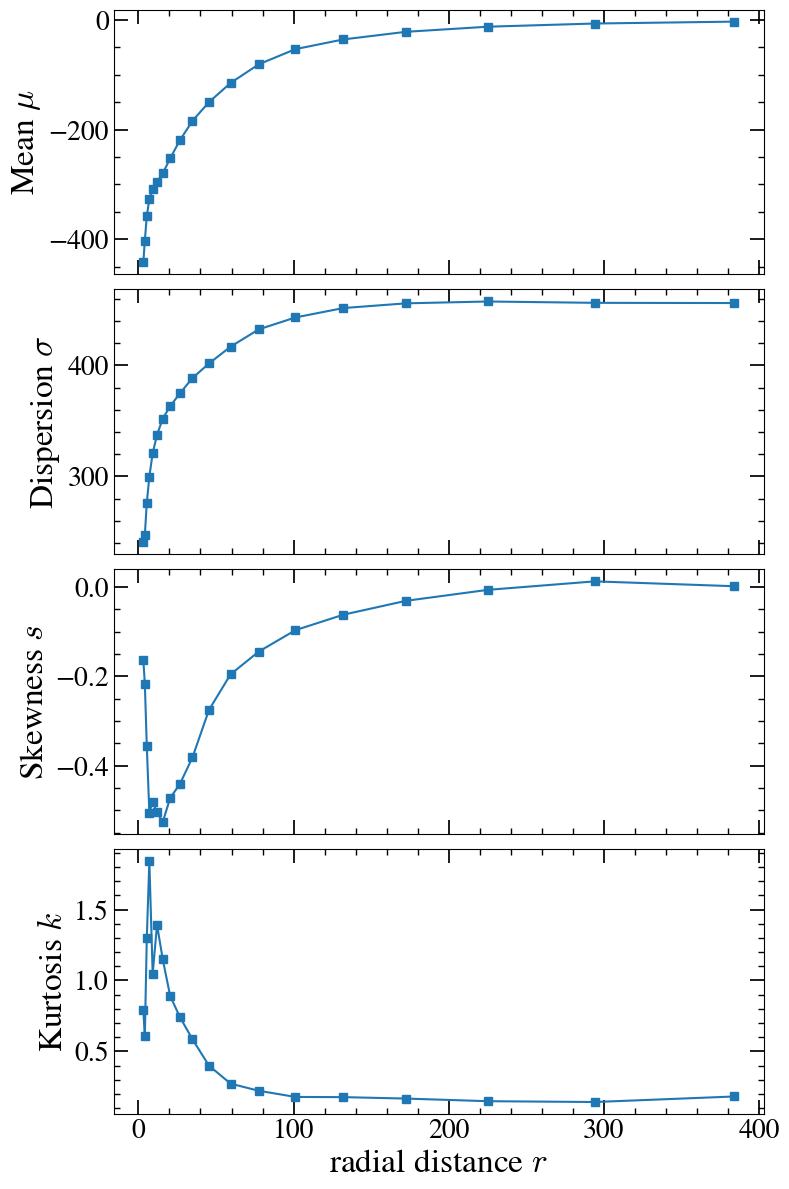

In [7]:
fig,axes = plt.subplots(nrows = 4,figsize=(8,12), sharex=True, layout='tight')

axes[0].plot(radial_bins[:-1],mean,marker='s')
axes[0].set(ylabel = r'Mean $\mu$')
axes[1].plot(radial_bins[:-1],dispersion, marker = 's')
axes[1].set(ylabel = r'Dispersion $\sigma$')
axes[2].plot(radial_bins[:-1], skews, marker = 's')
axes[2].set(ylabel = r'Skewness $s$')
axes[3].plot(radial_bins[:-1], kurt, marker='s')
axes[3].set(xlabel = r'radial distance $r$', ylabel = r'Kurtosis $k$')

plt.subplots_adjust(wspace = 0, hspace=0)

plt.show()